## Leitura dos csv's

In [1]:
#df1 = pd.read_csv('LIDC-IDRI_MetaData.csv')
#df1_sorted = df1.sort_values(by='Subject ID')
#df1_sorted

In [2]:
#df2 = pd.read_excel('lidc-idri nodule counts (6-23-2015).xlsx')
#df2_sorted = df2.sort_values(by='TCIA Patent ID')
#df2_sorted

In [3]:
#df3 = pd.read_excel('tcia-diagnosis-data-2012-04-20.xls')
#df3_sorted = df3.sort_values(by='TCIA Patient ID')
#df3_sorted
#ids = df3['TCIA Patient ID']

# Converta os IDs em uma string separada por vírgula
#ids_csv = ','.join(map(str, ids))

# Imprime os IDs separados por vírgula
#print(ids_csv)

## Pylidc

### 1. Classe Scan

In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pylidc as pyl

In [5]:
# Todos os CT scans com espessura de corte menor ou igual a 1 e um espaçamento de pixel menor ou igual a 0.6
scans = pyl.query(pyl.Scan).filter(pyl.Scan.slice_thickness <= 1, pyl.Scan.pixel_spacing <= 0.6)
print(scans.count())

#CT do paciente com o id LIDC-IDRI-0068
pid = 'LIDC-IDRI-0068'
scan = pyl.query(pyl.Scan).filter(pyl.Scan.patient_id == pid).first()
print(scan)

31
Scan(id=79,patient_id=LIDC-IDRI-0068)


In [6]:
#Numero de anotações do paciente 0068
print(len(scan.annotations))

#Nodulos do paciente
nods = scan.cluster_annotations()

#Quantidade de nodulos do paciente
print("%s has %d nodules." % (scan, len(nods)))

#Número de anotações por nodulo do paciente
for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))

22
Scan(id=79,patient_id=LIDC-IDRI-0068) has 6 nodules.
Nodule 1 has 4 annotations.
Nodule 2 has 4 annotations.
Nodule 3 has 4 annotations.
Nodule 4 has 2 annotations.
Nodule 5 has 4 annotations.
Nodule 6 has 4 annotations.


In [7]:
#Converte o scan num array NumPy para processamento da imagem
vol = scan.to_volume()
print(vol.shape)

Loading dicom files ... This may take a moment.
(512, 512, 261)


Loading dicom files ... This may take a moment.


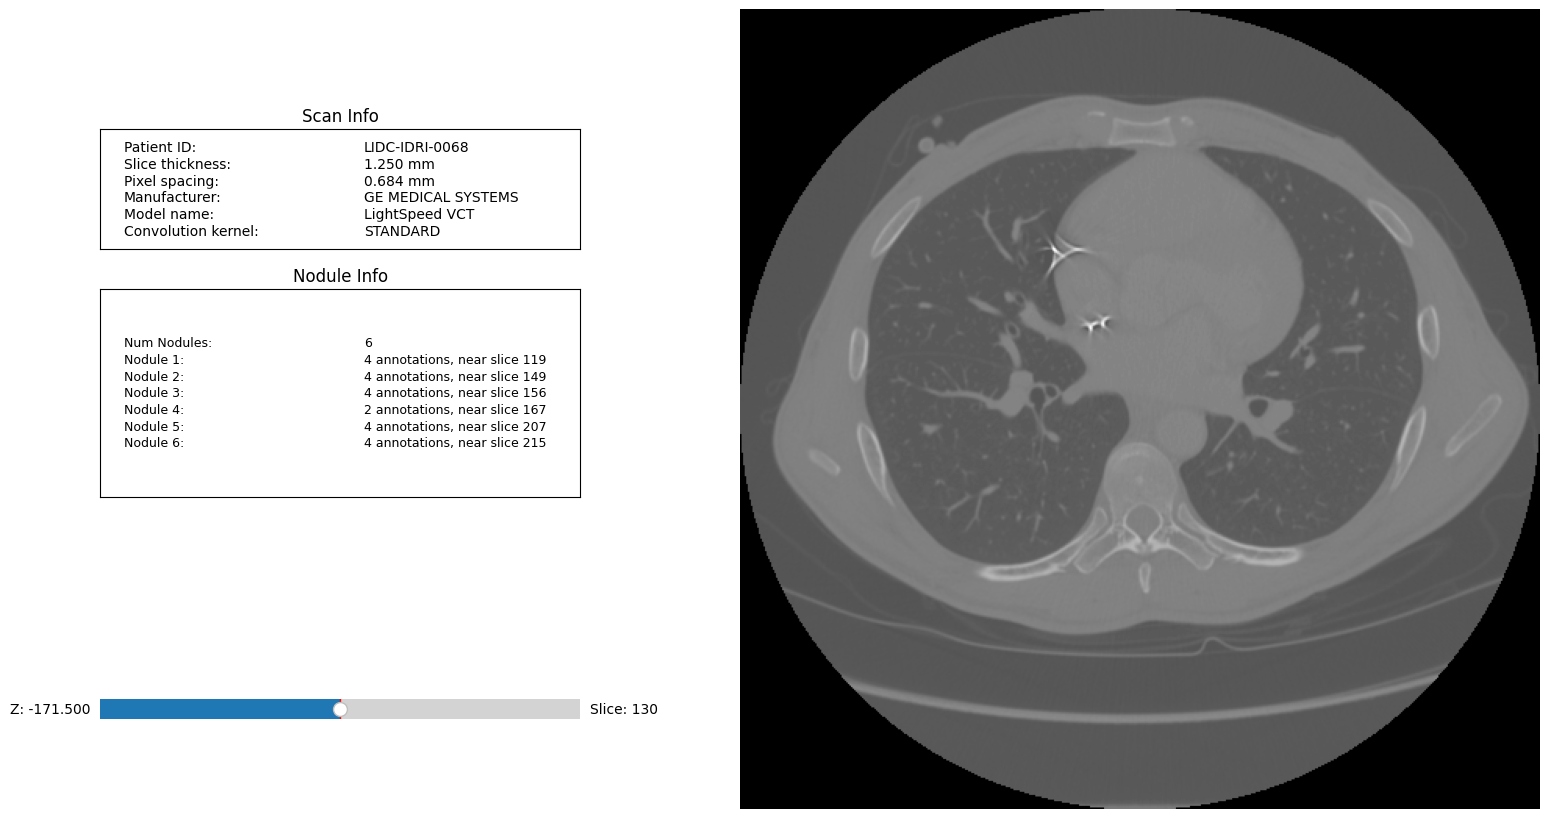

In [8]:
scan.visualize(annotation_groups=nods)

### 2. Classe Anotações

In [9]:
#Primeira anotação de todas no geral
ann = pyl.query(pyl.Annotation).first()

#Paciente com a primeira anotação
print(ann.scan.patient_id)

#Anotações do paciente 0068
anns = scan.annotations

#Número de anotações do paciente 0068
print(len(anns))

#Primeira anotação do paciente 0068
ann = scan.annotations[0]

LIDC-IDRI-0078
22


In [10]:
#Anotações com spiculation e malignancy igual a 5
anns = pyl.query(pyl.Annotation).filter(pyl.Annotation.spiculation == 5,pyl.Annotation.malignancy == 5)

#Numero de anotações que atendem aos critérios acima
print(anns.count())

91


In [11]:
#Primeira anotação com malignidade igual a 5
ann = pyl.query(pyl.Annotation).filter(pyl.Annotation.malignancy == 5).first()

#Nível de malignancy: malignancy -> formato número; Malignancy -> formato texto
print(ann.malignancy, ann.Malignancy)

#Margem: margin -> formato número; Margin -> formato texto
print(ann.margin, ann.Margin)
# => 2, 'Near Poorly Defined'

#Todas as características que podem ser vistas
print(pyl.annotation_feature_names)

#Tabela com todas as características da anotação
ann.print_formatted_feature_table()

5 Highly Suspicious
2 Near Poorly Defined
('subtlety', 'internalStructure', 'calcification', 'sphericity', 'margin', 'lobulation', 'spiculation', 'texture', 'malignancy')
Feature              Meaning                    # 
-                    -                          - 
Subtlety           | Obvious                  | 5 
Internalstructure  | Soft Tissue              | 1 
Calcification      | Absent                   | 6 
Sphericity         | Ovoid/Round              | 4 
Margin             | Near Poorly Defined      | 2 
Lobulation         | Near Marked Lobulation   | 4 
Spiculation        | No Spiculation           | 1 
Texture            | Solid                    | 5 
Malignancy         | Highly Suspicious        | 5 


In [12]:
#Primeira anotação
ann = pyl.query(pyl.Annotation).first()

#Contornos da anotação (nódulo) numa única fatia (slice)
contours = ann.contours

#Número de contornos
print(len(contours))

#diâmetro, área e volume do nódulo
print("%.2f mm, %.2f mm^2, %.2f mm^3" % (ann.diameter, ann.surface_area,ann.volume))

#A máscara é usada para segmentar a região de interesse na imagem
mask = ann.boolean_mask()

#imprime a forma (alt, larg, prof) e o tipo da máscara
print(mask.shape, mask.dtype)

6
20.84 mm, 1124.13 mm^2, 2439.30 mm^3
(34, 27, 6) bool


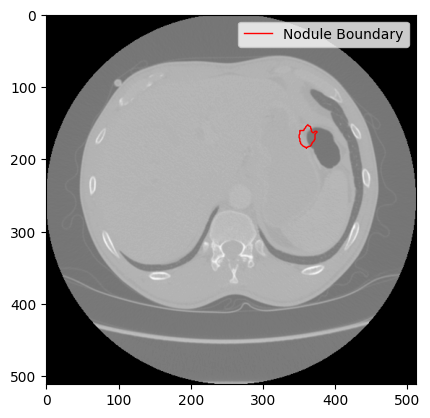

In [13]:
#Primeiro contorno do nodulo
con = ann.contours[0]

#Visualizar contorno
k = con.image_k_position
ii,jj = ann.contours[3].to_matrix(include_k=False).T

plt.imshow(vol[:,:,46], cmap=plt.cm.gray)
plt.plot(jj, ii, '-r', lw=1, label="Nodule Boundary")
plt.legend()
plt.show()

In [26]:
#Paciente 0068
scan = pyl.query(pyl.Scan).filter(pyl.Scan.patient_id == pid).first()

#Primeira anotação do paciente 0068
ann = scan.annotations[0]

# Caixa delimitadora que engloba a região de interesse (ROI)
# A saída contém três slices, cada uma representa a dimensão da caixa ao longo de um eixo (X,Y,Z)
bbox = ann.bbox()
print(bbox)

# cria um volume 3D a partir de um objeto de anotação médica (ann) e imprime a forma
vol = ann.scan.to_volume()
print(vol[bbox].shape)

(slice(194, 215, None), slice(147, 167, None), slice(210, 220, None))
Loading dicom files ... This may take a moment.
(21, 20, 10)


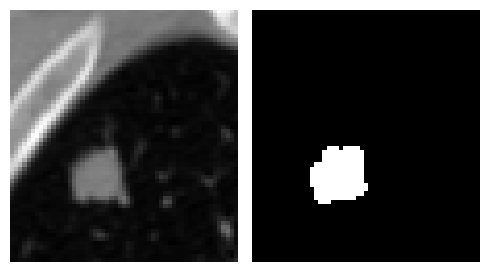

In [27]:
# Valor de preenchimento (padding) para a largura, altura e profundidade 
padding = [(30,10), (10,25), (0,0)]

# Máscara booleana que destaca a região de interesse (ROI) usando o padding
mask = ann.boolean_mask(pad=padding)

# Calcula a caixa delimitadora que envolve a região de interesse (ROI)
bbox = ann.bbox(pad=padding)

fig,ax = plt.subplots(1,2,figsize=(5,3))

ax[0].imshow(vol[bbox][:,:,2], cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].imshow(mask[:,:,2], cmap=plt.cm.gray)
ax[1].axis('off')

plt.tight_layout()
plt.show()

Loading dicom files ... This may take a moment.


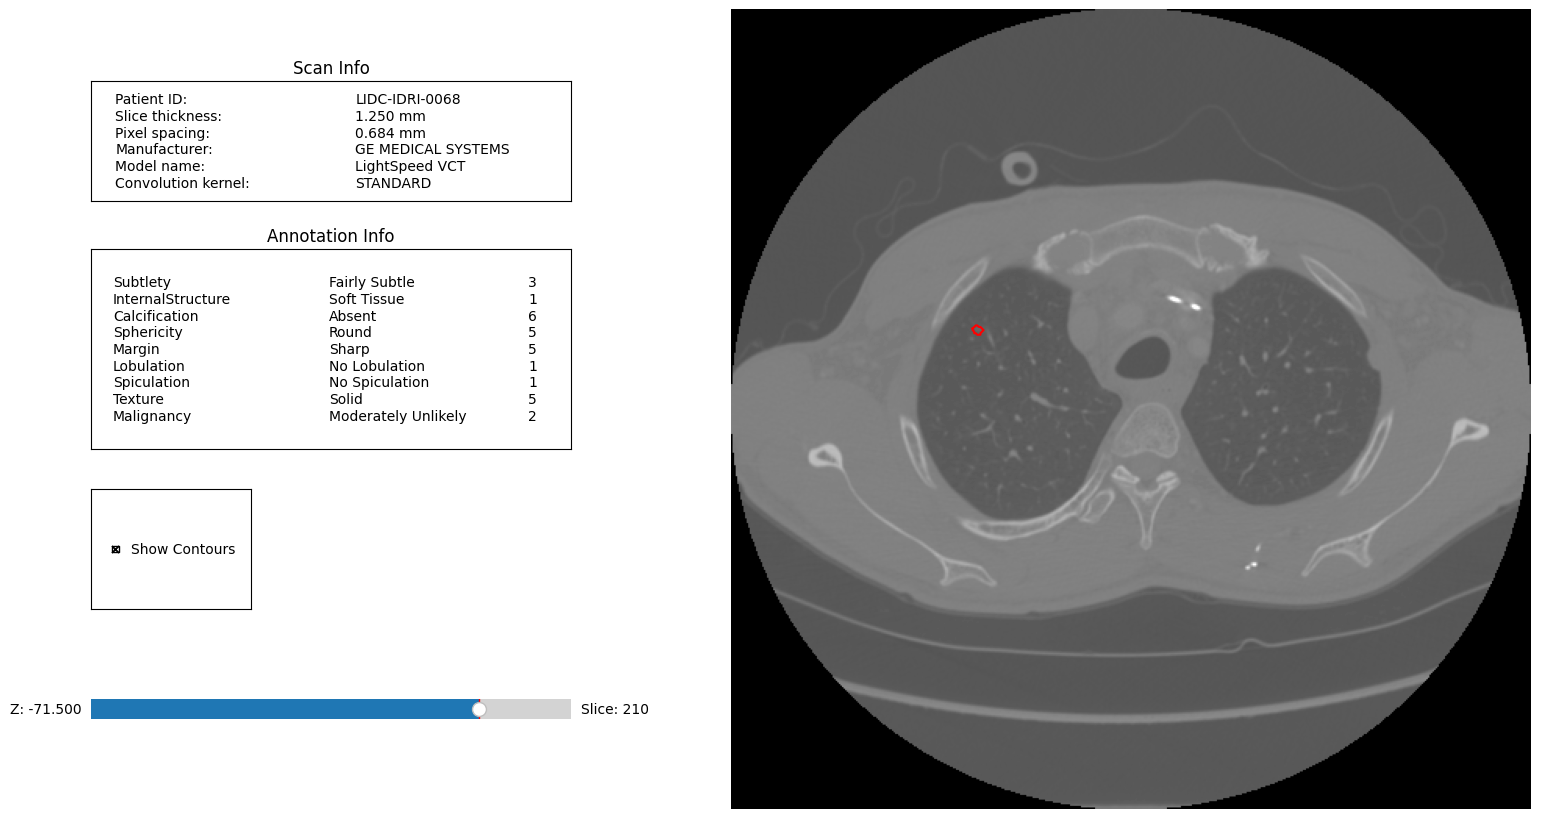

In [28]:
#Visualiza a anotação dentro do contexto do volume de CT em que foi identificada
ann.visualize_in_scan()

In [31]:
ann.visualize_in_3d()

AttributeError: module 'matplotlib.cm' has no attribute 'cmap_d'

### 3. Anotações - Consenso

Scan(id=79,patient_id=LIDC-IDRI-0068)
Loading dicom files ... This may take a moment.


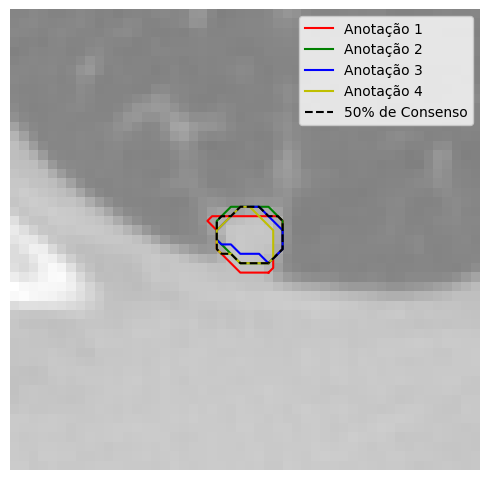

In [32]:
import numpy as np
import matplotlib.animation as manim
from skimage.measure import find_contours
from pylidc.utils import consensus

#CT do paciente com o id LIDC-IDRI-0068
scan = pyl.query(pyl.Scan).filter(pyl.Scan.patient_id == pid).first()

#Converte o scan num array NumPy para processamento da imagem
vol = scan.to_volume()

# Clusteriza as anotações para um nódulo específico
nods = scan.cluster_annotations()
anns = nods[0]  # Seleciona as anotações para o primeiro nódulo

# Calcula o consenso das anotações com um nível de consenso de 50% e padding
cmask, cbbox, masks = consensus(anns, clevel=0.5, pad=[(20, 20), (20, 20), (0, 0)])

# Seleciona a fatia do meio (slice) no eixo z
k = int(0.5 * (cbbox[2].stop - cbbox[2].start))

# Cria uma figura e um eixo para plotagem
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Mostra a fatia do volume de TC com um mapa de cores em tons de cinza
ax.imshow(vol[cbbox][:, :, k], cmap=plt.cm.gray, alpha=0.5)

# Cores para as diferentes anotações
colors = ['r', 'g', 'b', 'y']

# Plota os contornos das anotações originais para a kº slice
for j in range(len(masks)):
    for c in find_contours(masks[j][:, :, k].astype(float), 0.5):
        label = "Anotação %d" % (j+1)
        plt.plot(c[:, 1], c[:, 0], colors[j], label=label)

# Plota o contorno do consenso de 50%
for c in find_contours(cmask[:, :, k].astype(float), 0.5):
    plt.plot(c[:, 1], c[:, 0], '--k', label='50% de Consenso')

# Configurações adicionais para a plotagem
ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

### 4. Queries Avançadas

### Resultado aleatório

In [34]:
from sqlalchemy import func

# Todos os nódulos altamente suspeitos
anns = pyl.query(pyl.Annotation).filter(pyl.Annotation.malignancy == 5)

#Ordena-se os resultados de forma aleatória e pega-se no primeiro resultado
ann = anns.order_by(func.random()).first()
print(ann.id, ann.Malignancy)

ann = anns.order_by(func.random()).first()
print(ann.id, ann.Malignancy)

5357 Highly Suspicious
764 Highly Suspicious


### Consultar vários parâmetros de modelos com uma junção

In [39]:
#Número de anotações com valor de malignidade não indeterminado
anns = pyl.query(pyl.Annotation).filter(pyl.Annotation.malignancy != 3)
print(anns.count())

#Número de scans com espessura de corte inferior a 1 mm
scans = pyl.query(pyl.Scan).filter(pyl.Scan.slice_thickness < 1)
print(scans.count())

# Consulta-se uma anotação que seja limitado pelos parâmetros do seu exame correspondente (Scan)
# Neste caso, pega em todas as anotações com um valor de malignidade não indeterminado (pyl.Annotation.malignancy != 3)
# e cujo exame correspondente tenha espessura de corte inferior a 1 mm (pyl.Scan.slice_thickness < 1).
anns = pyl.query(pyl.Annotation).join(pyl.Scan).filter(pyl.Scan.slice_thickness < 1, pyl.Annotation.malignancy != 3)
print(anns.count())

4253
39
181


### Filtrar com a cláusula "in"

In [41]:
#O objetivo é contar o número total de anotações pertencentes aos exames na consulta anterior

#Método 1: percorrer todos os exames e somar o número de anotações pertencentes a cada um deles
scans = pyl.query(pyl.Scan).filter(pyl.Scan.slice_thickness < 1)
n_anns = sum([len(scan.annotations) for scan in scans])
print(n_anns)

#Método 2: consultar todas as anotações cujo atributo scan_id seja um ID presente na lista de IDs dos exames
sids = [scan.id for scan in scans]
anns = pyl.query(pyl.Annotation).filter(pyl.Annotation.scan_id.in_(sids))
print(anns.count())

300
300


### Agrupar nódulos com atributos semelhantes

In [46]:
from sqlalchemy import func

# Obter uma lista dos atributos. Também podíamos listá-los todos na consulta, ou seja,
# pyl.Annotation.spiculation, pyl.Annotation.malignancy, etc...
todos_os_atributos = [getattr(pyl.Annotation, nome_atributo)
                    for nome_atributo in pyl.annotation_feature_names]

grupos = pyl.query(func.group_concat(pyl.Annotation.id)).group_by( *todos_os_atributos ).having(func.count('*') > 1)

#Número de grupos de anotações de nódulos cujos membros do grupo têm valores de características idênticos
print(grupos.count())

#Imprime tuplas de 1 elemento cujo elemento é uma string de IDs de Anotações, separados por vírgulas
print(grupos[0], grupos[1])

# IDs do primeiro grupo:
ids = grupos[0][0].split(',')

for id in ids:
    ann = pyl.query(pyl.Annotation).get(id)
    #Para cada id imprime os valores das características
    print(ann.feature_vals())

837
('6764,6766',) ('5781,5782,5937',)
[1 1 3 3 5 1 1 5 1]
[1 1 3 3 5 1 1 5 1]
296


In [51]:
import numpy as np

#Cria lista com o tamanho de cada grupo
tamanhos_do_grupo = [len(g[0].split(',')) for g in grupos]

#Imprime o tamanho do grupo com mais ids
print(max(tamanhos_do_grupo))

# Obtém a localização do grupo de maior tamanho.
i = np.argmax(tamanhos_do_grupo)

# Primeiro ID no grupo de maior tamanho
id = grupos[i][0].split(',')[0]

ann = pyl.query(pyl.Annotation).get(id)

#Imprime a tabela com as características desse id
ann.print_formatted_feature_table()

# Podemos confirmar que têm caracteristicas iguais para todos os ids desse grupo calculando a variância:
#Ids de todos os do grupo
ids = [id for id in grupos[i][0].split(',')]

# Valores de características para todas as anotações no grupo
fvals = pyl.query(*todos_os_atributos).filter(pyl.Annotation.id.in_( ids )).all()
fvals = np.array(fvals)

#Imprime o numero de ids e o numero de caracteristicas
print(fvals.shape)

#Imprime a variância das características que dá zero pois sao todas iguais
print(fvals.var(axis=0))

296
Feature              Meaning                    # 
-                    -                          - 
Subtlety           | Fairly Subtle            | 3 
Internalstructure  | Soft Tissue              | 1 
Calcification      | Absent                   | 6 
Sphericity         | Round                    | 5 
Margin             | Sharp                    | 5 
Lobulation         | No Lobulation            | 1 
Spiculation        | No Spiculation           | 1 
Texture            | Solid                    | 5 
Malignancy         | Moderately Unlikely      | 2 
(296, 9)
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Imagens Download 

In [23]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# Caminho para a pasta que contém as pastas LIDC-IDRI-XXXX
diretorio_principal = "C:\Mariana\Licenciatura 3º ano\Laboratórios de IACD\Imagens2"

# Lista para armazenar os volumes de cada escaneamento
volumes = []

# Iterar pelas pastas LIDC-IDRI-XXXX
for pasta in os.listdir(diretorio_principal):
    pasta_completa = os.path.join(diretorio_principal, pasta)
    
    if os.path.isdir(pasta_completa):
        # Encontrar todos os arquivos DICOM nas subpastas
        arquivos_dicom = []
        for root, _, files in os.walk(pasta_completa):
            for file in files:
                if file.endswith(".dcm"):
                    arquivos_dicom.append(os.path.join(root, file))

        # Carregar os arquivos DICOM e criar um volume
        volume = []
        shape = None
        for arquivo_dicom in arquivos_dicom:
            dcm = pydicom.dcmread(arquivo_dicom)
            # Verificar se a tag "Pixel Data" está presente
            if hasattr(dcm, "PixelData"):
                if shape is None:
                    shape = dcm.pixel_array.shape
                # Verificar se o formato é consistente com as outras imagens
                if shape == dcm.pixel_array.shape:
                    volume.append(dcm.pixel_array)
        
        if volume:
            volume = np.stack(volume, axis=-1).astype(np.int16)
            volumes.append(volume)

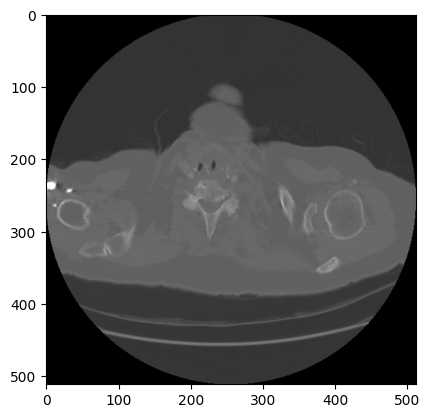

In [24]:
# Agora você tem uma lista 'volumes' com os volumes de cada escaneamento
# volumes[0] contém o volume do primeiro escaneamento, volumes[1] contém o volume do segundo, e assim por diante
plt.imshow(volumes[0][:, :, 0], cmap='gray')
plt.show()